In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv


Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU, ELU,ReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


2024-08-08 13:10:08.856043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 13:10:08.856184: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 13:10:09.015163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading Data

In [3]:
data = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv',encoding='latin-1')
data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


Explore Data

In [4]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
data.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
data.describe().round(2).style.background_gradient(cmap="Blues")

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.510000,46.240000,62127.240000,9607.650000,431475.710000,44209.800000
std,0.500000,7.980000,11703.380000,3489.190000,173536.760000,10773.180000
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.950000,54391.980000,7397.520000,299824.200000,37629.900000
50%,1.000000,46.050000,62915.500000,9655.040000,426750.120000,43997.780000
75%,1.000000,51.610000,70117.860000,11798.870000,557324.480000,51254.710000
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [8]:
data.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [9]:
data.nunique()

customer name          498
customer e-mail        500
country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [10]:
df_car = data.drop(columns=['customer name','customer e-mail','country']) 

In [11]:
df_car

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


Visulaization Data

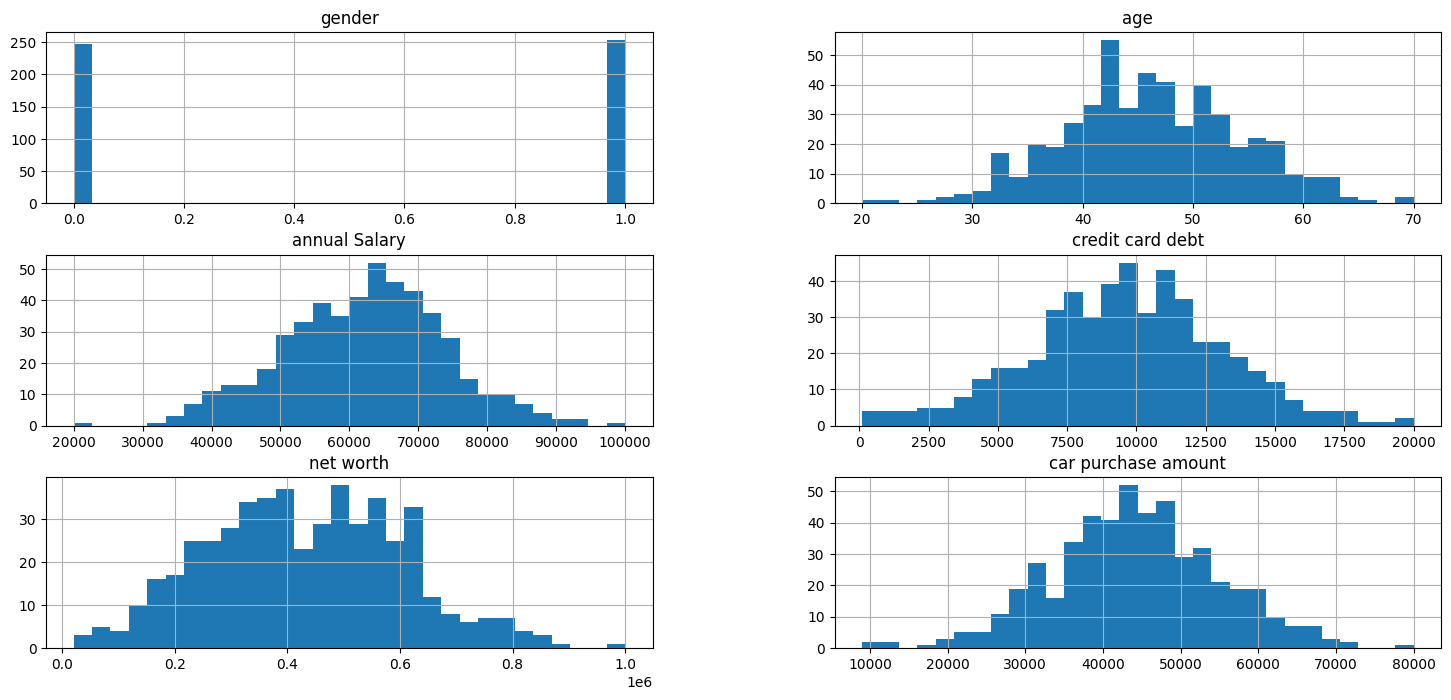

In [12]:
df_car.hist(bins=30, figsize=(18,8))
plt.show()

<Axes: >

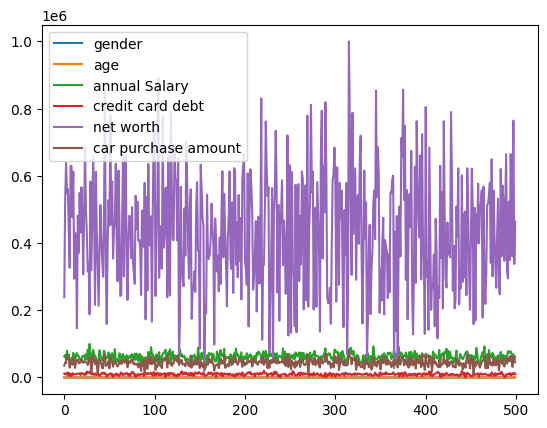

In [13]:
df_car.plot()

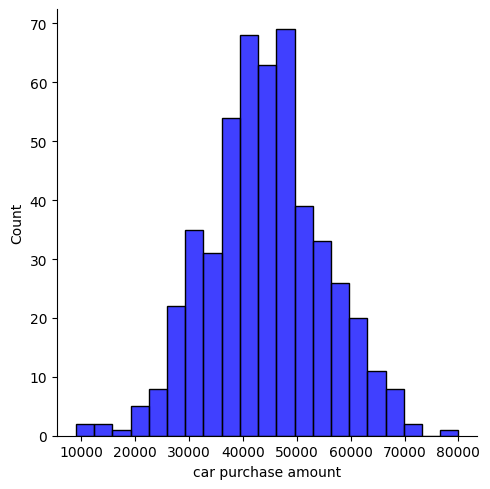

In [14]:
sns.displot(df_car["car purchase amount"],color="blue" )

<Axes: xlabel='age', ylabel='Count'>

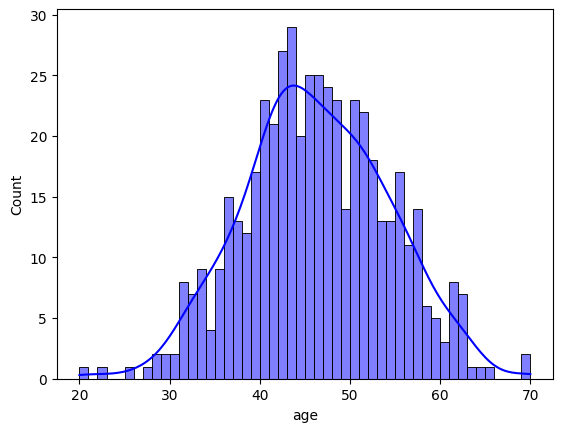

In [15]:
sns.histplot(df_car["age"], bins=50, color='blue', kde=True)

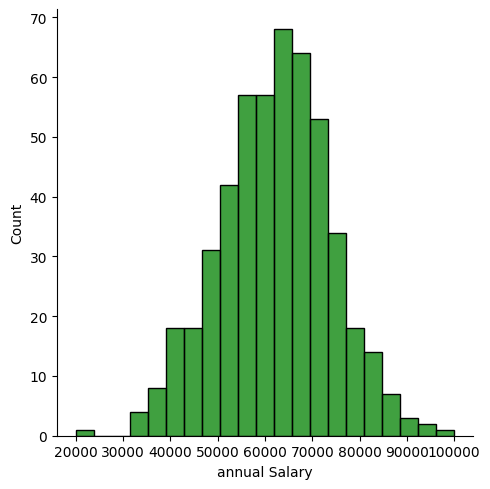

In [16]:
sns.displot(df_car["annual Salary"],color="green" )

<Axes: xlabel='net worth', ylabel='Count'>

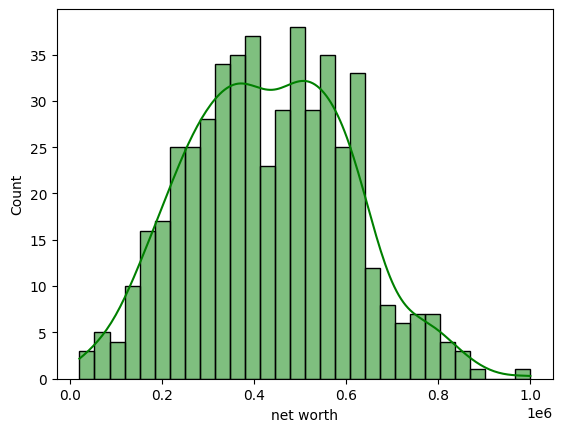

In [17]:
sns.histplot(df_car["net worth"], bins=30, color='green', kde=True)

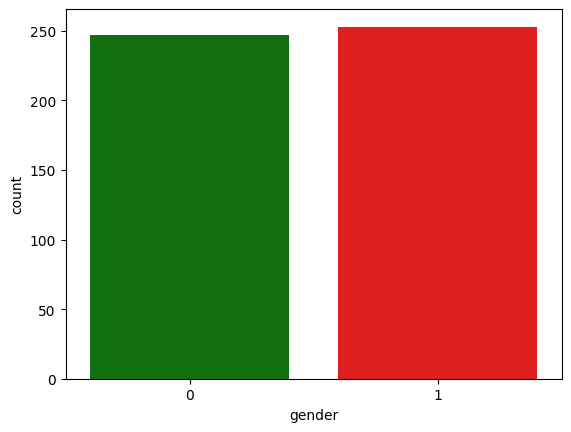

In [18]:
# count male and female in data 
sns.countplot(x = "gender",data=df_car,palette=("g","r"))
plt.show()

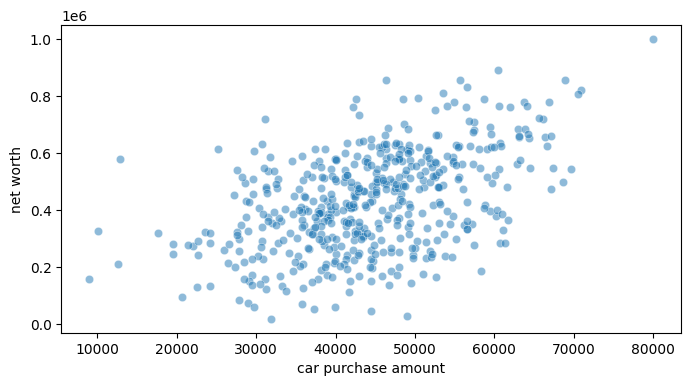

In [19]:
# distribution between car purchase amount and net worth
plt.figure(figsize=(8, 4))
sns.scatterplot(x='car purchase amount', y='net worth', data=df_car, alpha=0.5)
plt.show()
                

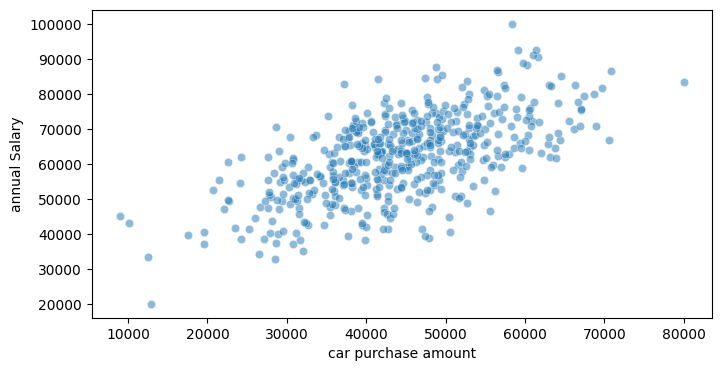

In [20]:
# distribution between car purchase amount and annual Salary
plt.figure(figsize=(8, 4))
sns.scatterplot(x='car purchase amount', y='annual Salary', data=df_car, alpha=0.5)
plt.show()
              

Find Outliers

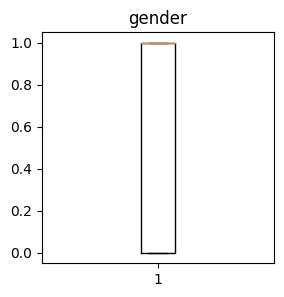

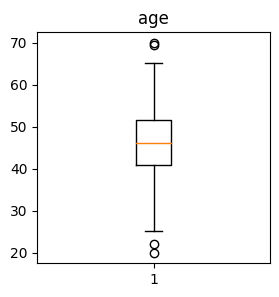

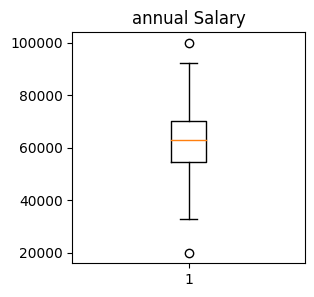

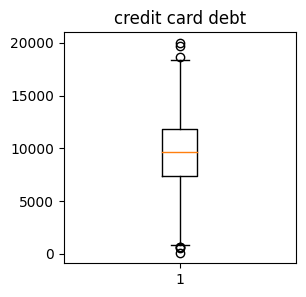

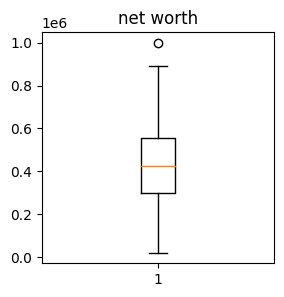

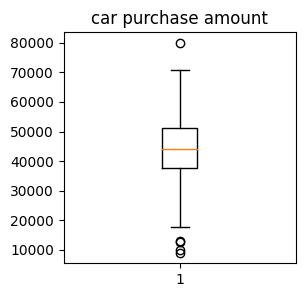

In [21]:
def create_boxplots(df):
    for col in df.columns:
        plt.figure(figsize = (3,3))
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()
create_boxplots(df_car)        

Correlation Between Feature and Target

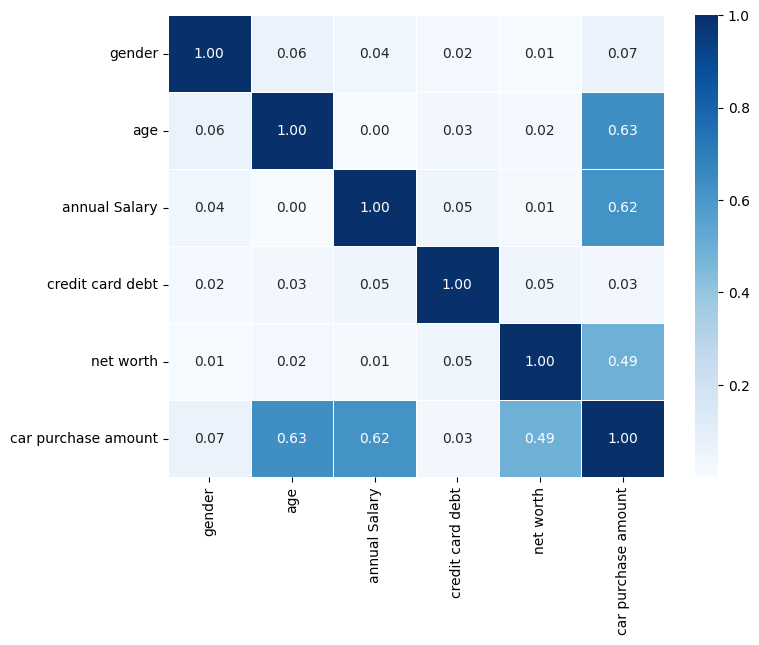

In [22]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(abs(df_car.corr()), cbar=True,  annot=True, linewidth=0.5 ,fmt='.2f', cmap='Blues')
plt.show()

Split the data to feature and target

In [23]:
x = df_car.drop('car purchase amount',axis = 1)  #feature
y = df_car['car purchase amount']  #target

Scaling the Data

In [24]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

Split data into train and test data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42 ,shuffle=True)

print("x_train shape is: ", x_train.shape)
print("x_test shape is: ", x_test.shape)
print("y_train shape is: ", y_train.shape)
print("y_test shape is: ", y_test.shape)

x_train shape is:  (400, 5)
x_test shape is:  (100, 5)
y_train shape is:  (400, 1)
y_test shape is:  (100, 1)


Bulid ANN Model

In [26]:
model = Sequential()
model.add(Dense(8, input_dim=5, activation='tanh')) # Input layer with 5 input features
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear')) # Output layer with 1 neuron (regression)

model.compile(loss='mean_squared_error', optimizer='adam')

history=model.fit(x_train, y_train, epochs=50, batch_size=30, verbose=1,validation_split=0.2,shuffle=True,
)
  
loss= model.evaluate(x_test, y_test)
print("Test Accuracy:", loss)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.8122 - val_loss: 0.7303
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6490 - val_loss: 0.6216
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5133 - val_loss: 0.5213
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5178 - val_loss: 0.4193
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3678 - val_loss: 0.3272
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2616 - val_loss: 0.2508
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1748 - val_loss: 0.1984
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1571 - val_loss: 0.1659
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0988 - val_loss: 0.1417
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1004 - val_loss: 0.1255
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0827 - val_loss: 0.1122
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0599 - val_l

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,013 (3.96 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 676 (2.64 KB)

In [28]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [29]:
print("prediction shape is ",format(y_pred.shape))

prediction shape is  (100, 1)


In [30]:
loss = model.evaluate(x_test, y_test)
print("model loss :", loss)
#print("model accuracy :",accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 
model loss : 0.01436725351959467


In [31]:
def plot_loss(history):
    
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    epochs = range(1, len(training_loss) + 1)

    plt.plot(epochs, training_loss, 'b', label='Training Loss')
    plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

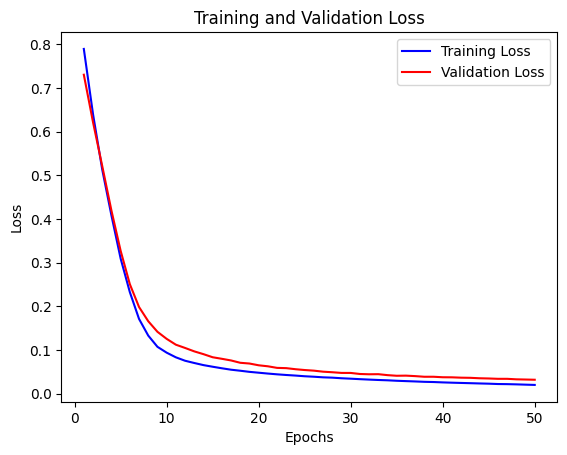

In [32]:
plot_loss(history)

Thank You